In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np   

total_result = []
for i in range(2009,2022):
    
    source = requests.get('https://www.lottomaxnumbers.com/numbers/'+str(i)).text
    soup = BeautifulSoup(source,'lxml')
    

    num_list = []

    for p_item in soup.find_all('li',class_ = "ballGen ball pngfix"):
        
        
        number = (p_item.text)
        num_list.append(number)
        result_per_year = [num_list[i:i + 7] for i in range(0, len(num_list),7)]  
        
    total_result.append(result_per_year)

In [2]:
draw_list = [total_result[i][j] for i in range(len(total_result)) for j in range(len(total_result[i]))]
draw_list_int = [list(map(int,item)) for item in draw_list]

In [3]:
all_numbers = [j for i in draw_list for j in i ]
num_freq = {}
for num in all_numbers:
    if num in num_freq.keys():
        num_freq[num] = num_freq[num] + 1
    else:
        num_freq[num] = 1
num_freq
dic = {k: v for k, v in sorted(num_freq.items(), key=lambda item: item[1], reverse = True)}
most_frequent_numbers = list(dic.items())[:5]
most_frequent_numbers

[('39', 125), ('24', 115), ('19', 112), ('28', 112), ('30', 109)]

In [4]:
def rep(aux, n):  
    
    trans = [item-aux.index(item) for item in aux] # subtract each value in a list from its index
    repeated_index = list(set([x for x in trans if trans.count(x) >= n]))
    
    repeated_element_original_index = []
    for i in range(len(trans)):
        for j in range(len(repeated_index)): 
            if trans[i] == repeated_index[j]:
                repeated_element_original_index.append(i)
    return repeated_element_original_index

In [5]:
def Most_common_consecutive(Draw_list,n):
    lst = []
    for items in Draw_list:
        x = rep(items, n)
        if x:
            for k in range(len(x)-n+1):
                if sum(np.diff(x[k:k+n])) == n-1:
                    #Triplet.append([items[x[k]],items[x[k+1]],items[x[k+2]]])
                    lst.append([ items[x[i]] for i in range(k,k+n) ]) 

    lst_str = [str(item) for item in lst]
    freq = {}
    for lst in lst_str:
        if lst in freq:
            freq[lst] +=1
        else:
            freq[lst] =1
    Most_freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse = True)}
    Most_freq_consecutive_n_tuple = list(Most_freq.items())[:8] # First 8 entries
    return Most_freq_consecutive_n_tuple

In [6]:
Most_common_consecutive(draw_list_int,2)

[('[30, 31]', 20),
 ('[18, 19]', 20),
 ('[16, 17]', 19),
 ('[28, 29]', 19),
 ('[25, 26]', 18),
 ('[24, 25]', 18),
 ('[14, 15]', 18),
 ('[8, 9]', 17)]

In [7]:
Most_common_consecutive(draw_list_int,3)

[('[29, 30, 31]', 7),
 ('[16, 17, 18]', 4),
 ('[24, 25, 26]', 4),
 ('[14, 15, 16]', 4),
 ('[23, 24, 25]', 4),
 ('[20, 21, 22]', 4),
 ('[17, 18, 19]', 3),
 ('[27, 28, 29]', 3)]

In [8]:
import itertools as itt

def Most_common_n_tuple(Draw_list,n): # n is the n_tuple
    common = []
    for item in Draw_list:
        common += list(itt.combinations(item, n))

    Common_pairs = [list(item)  for item in common]

    Common_pairs_str = [str(item) for item in Common_pairs]

    freq_common = {}
    for lst in Common_pairs_str:
        if lst in freq_common:
            freq_common[lst] +=1
        else:
            freq_common[lst] =1
    Most_freq_common = {k: v for k, v in sorted(freq_common.items(), key=lambda item: item[1], reverse = True)}
    Most_freq_consecutive_common_pairs = list(Most_freq_common.items())[:8] # First five entries
    return Most_freq_consecutive_common_pairs

In [9]:
Most_common_n_tuple(draw_list_int,2)

[('[8, 28]', 27),
 ('[8, 24]', 23),
 ('[1, 39]', 23),
 ('[11, 20]', 23),
 ('[24, 26]', 22),
 ('[2, 39]', 22),
 ('[2, 22]', 22),
 ('[24, 39]', 22)]

In [97]:
Most_common_n_tuple(draw_list_int,3)

[('[11, 20, 22]', 8),
 ('[29, 30, 31]', 7),
 ('[19, 32, 40]', 7),
 ('[11, 24, 26]', 7),
 ('[37, 38, 43]', 7),
 ('[8, 28, 48]', 7),
 ('[5, 38, 46]', 7),
 ('[14, 26, 34]', 7)]

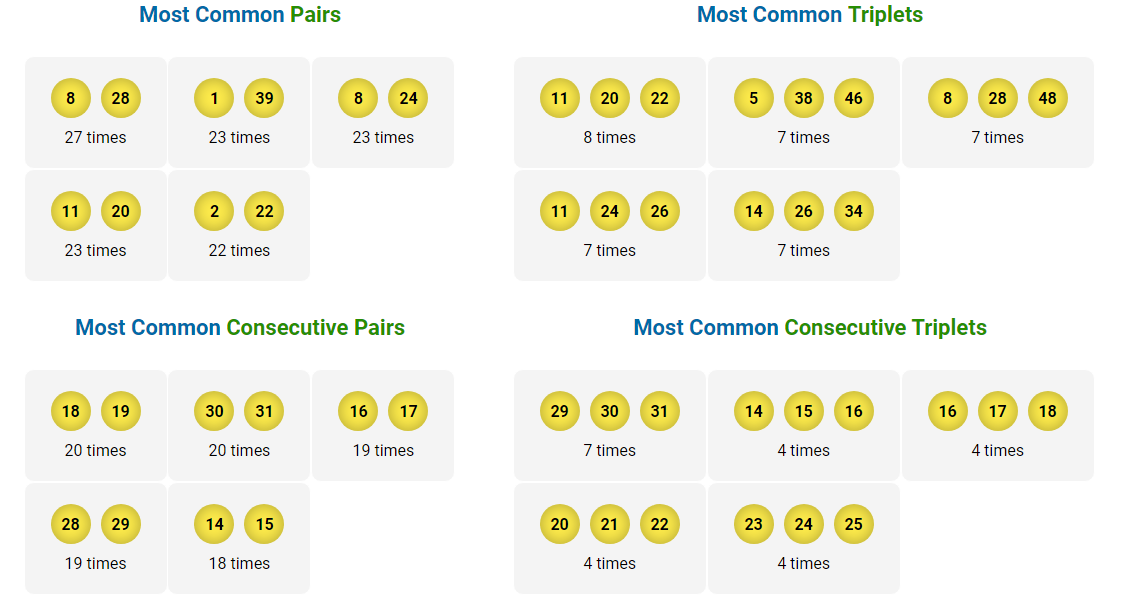